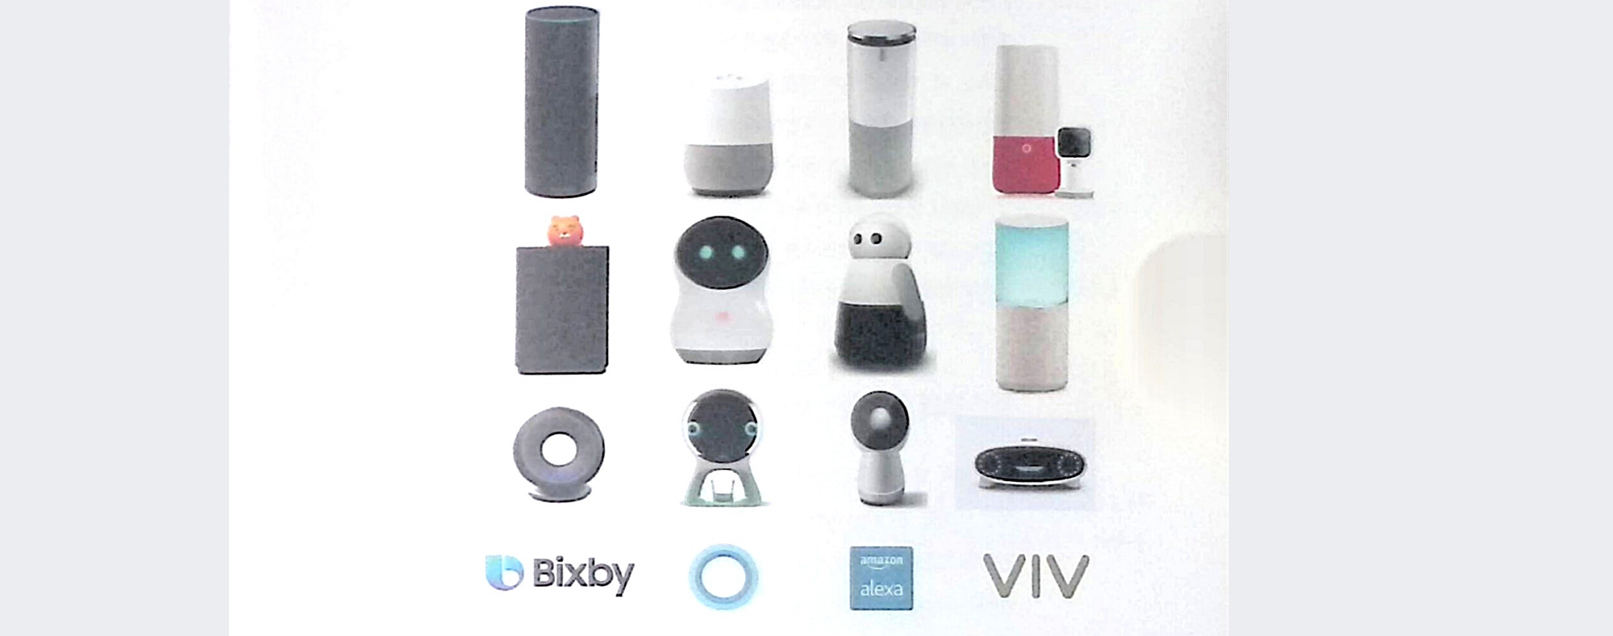

   * 자연어 처리 (Natural Language Processing, NLP)

## 1. 텍스트의 토큰화
  * 토큰화 : 입력된 텍스트를 단어별, 문장별, 형태소별로 잘게 나누는 과정
  * text_to_word_sequence() 

In [57]:
#주어진 문장을 '단어'로 토큰화 하기

#케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러 옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전처리할 텍스트를 정합니다.

text = '해보지 않으면 해낼 수 없다'
 
# 해당 텍스트를 토큰화 합니다.

result = text_to_word_sequence(text)

print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


   * 단어의 빈도 수 세기 : 텍스트 중 중복 단어 수 세기
   * Bag-of-Words : 같은 단어끼리 따로 따로 가방에 담은 뒤 각 가방에 몇 개의 단어가 들어있는지 세는 기법
   * Tokennizer()

In [58]:
#단어 빈도수 세기
from tensorflow.keras.preprocessing.text import Tokenizer

#전처리 하려는 세개의 문장을 정합니다.

docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.

token = Tokenizer()            # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
 
#단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다. 
 
print("\n단어 카운트:\n", token.word_counts) 
#Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict클래스를 사용합니다.
 
#출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)




단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'합니다': 1, '나누어': 1, '텍스트의': 2, '각': 1, '먼저': 1, '토큰화': 3, '단어를': 1, '단어로': 1, '딥러닝에서': 2, '인식됩니다': 1, '해야': 1, '할': 1, '사용': 1, '수': 1, '한': 1, '있습니다': 1, '결과는': 1})

각 단어에 매겨진 인덱스 값:
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


## 2. 단어의 원-핫 인코딩
   * 원-핫 인코딩(one-hot encoding) : 각 단어를 모두 0으로 바꾸어 주고 원하는 단어 만 1로 바꾸어 주는것 
   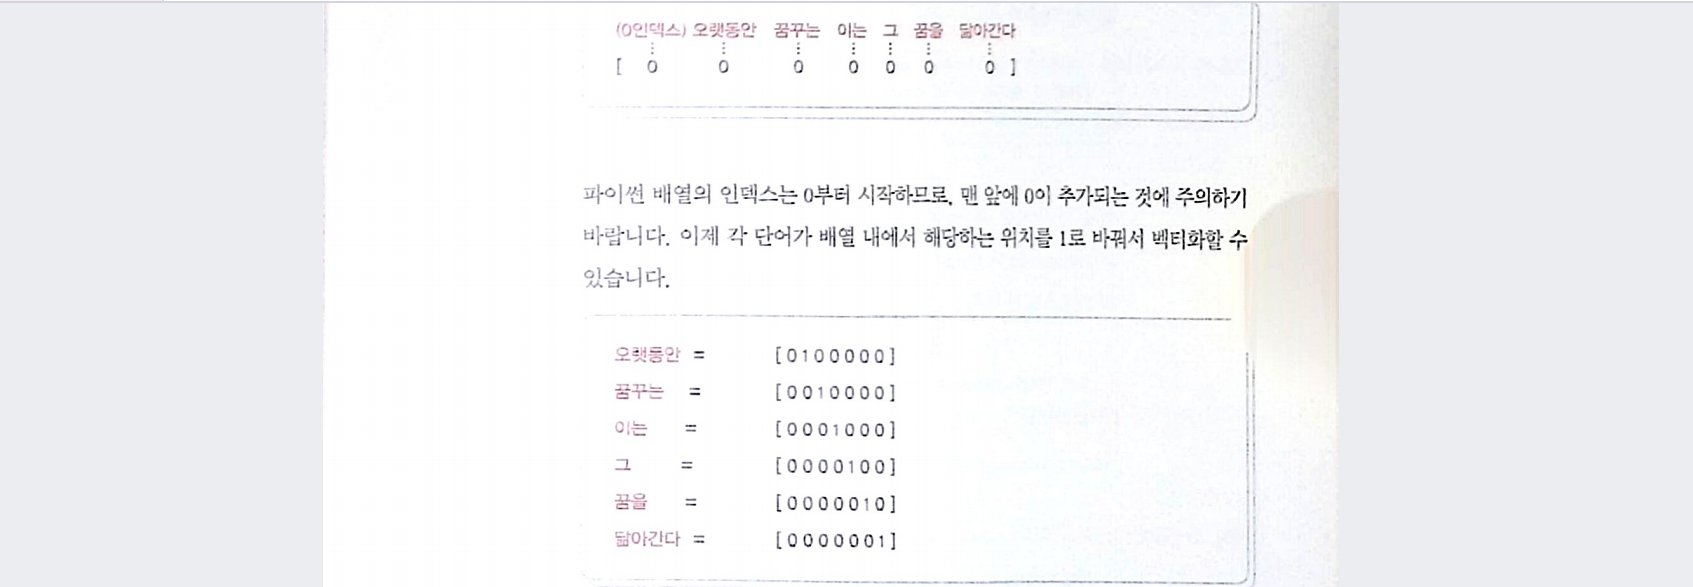

In [59]:
 # 토큰화 & 단어 인덱스 값 출력
from tensorflow.keras.preprocessing.text import Tokenizer

text = '오래동안 꿈꾸는 이는 그 꿈을 닮아간다'

token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts([text])       # 토큰화 함수에 문장 적용
print(token.word_index)


{'오래동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [60]:
# 토큰의 인덱스 배열 출력
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [61]:
# 원-핫 인코딩

# 1~6 인덱스 정수를 0과 1로만 이루어진 배열로 바꾸어주는 to_categorical() 함수 호출

from tensorflow.keras.utils import to_categorical

# 인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기

word_size = len(token.word_index) + 1

x = to_categorical(x, num_classes=word_size)

print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


## 3. 단어 임베딩
  * 단어 임베딩(word embedding) : 원-핫-인코딩 단어를 정해진 길이로 압축
  * 원-핫-인코딩을 사용해 만든 16차원 벡터가 단어 임베딩을 통해 4차원 벡터로 축약
  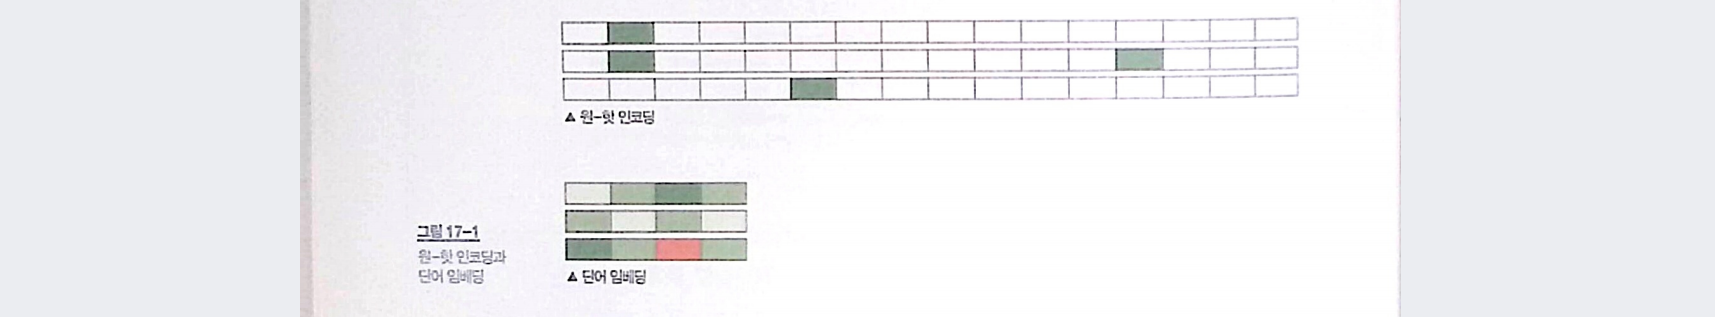

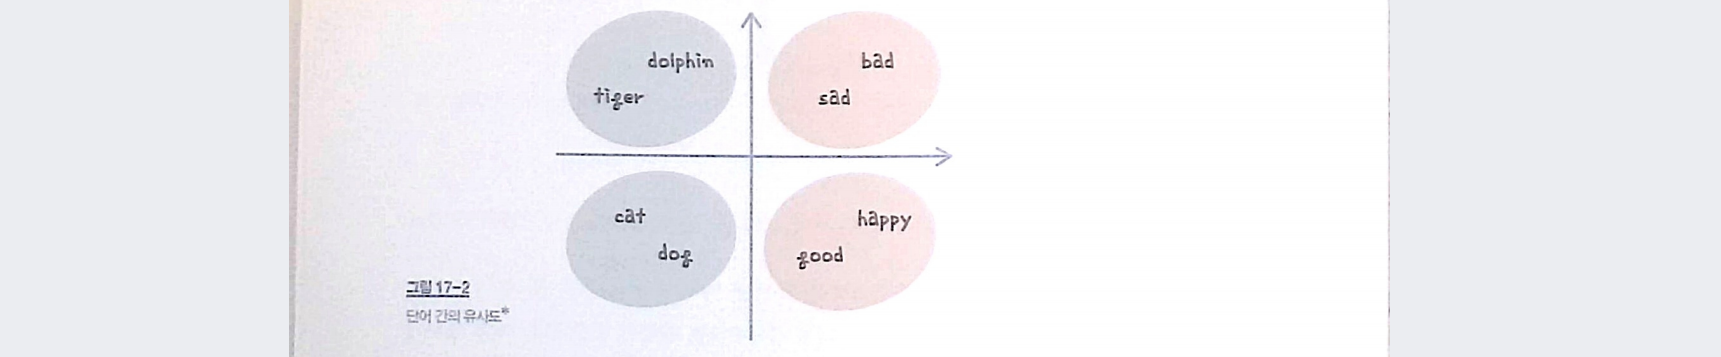

    * 단어 유사도를 고려 각 배열을 새로운 수치로 바꾸어 줌
    * 오차 역전파 사용 적절한 크기로 배열을 바꾸어 주기 위해 최적의 유사도를 게산하는 학습과정을 거침
    *embedding()함수 사용

    from keras.layers import Embedding

    model = Sequential()
    model.add(Embedding(16,4, input_length=2)


## 4. 텍스트를 읽고 긍정, 부정 예측하기
   * 영화 리뷰 10개 불러와 긍정 1, 부정 0 클래스 지정

In [62]:
# 텍스트 리뷰 자료를 지정합니다.

from numpy import array 

docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.

classes = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0]) 

In [63]:
# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)
 #토큰화 된 결과를 출력해 확인

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [64]:
# 토큰에 지정된 인덱스로 새로운 배열 생성

x = token.texts_to_sequences(docs)

print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


   * 패딩(padding) 과정
      *  입력된 리뷰의 토큰화된 토큰수(길이)를 동일하게 만드는 과정
      *  '최고예요' = ([3]) 1개 토큰 , '참 잘 만든 영화예요' = ([4, 5, 6, 7]) 4개 토큰
      * 딥러닝 모델에 입력하려면 학습데이터의 길이가 동일해야함 이를 또 같이 맞추는 과정(padding)
      *pad_sequence() : 원하는 길이보다 짧은 부분은 숫자 0을 넣어서 채워주고, 긴 데이터는 잘라서 길이를 맞추어 줌

In [69]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# padding
 #서로 다른 길이의 데이터를 4로 맞추기
padded_x = pad_sequences(x, 4)
print(padeded_x)

[[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [70]:
from keras.layers import Embedding

# Embedding(입력, 출력, 단어수)
# 단어 수 
word_size = len(token.word_index) + 1     # 전체 단어의 맨 앞에 0이 먼저 나놔야 함으로 총 단어 수에 1을 더함

Embedding(word_size, 8, input_length=4)

In [72]:
#단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding

model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 0s 484ms/step - loss: 0.7028 - accuracy: 0.3000
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.3000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.3000
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.3000
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6929 - accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.4000
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.4000
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6832 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.8000
Epoch 11/20
1/1 [==================

In [ ]:
import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding


#주어진 문장을 '단어'로 토큰화 하기

#케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러 옵니다.

 
